## Exercises

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine:

- load the ../data/wines.csv into Pandas
- use the column called "Class" as target
- check how many classes are there in target, and if necessary use dummy columns for a Multiclass classification
- use all the other columns as features, check their range and distribution (using seaborn pairplot)
- rescale all the features using either MinMaxScaler or StandardScaler
- build a deep model with at least 1 hidden layer to classify the data
- choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- choose an optimizer
- choose a value for the learning rate, you may want to try with several values
- choose a batch size
- train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- what's the minimum number of epochs to converge?
- repeat the training several times to verify how stable your results are

In [159]:
import pandas as pd
df_w = pd.read_csv('../data/wines.csv')
df_w2 = pd.read_csv('../data/wines.csv')
df_w3 = pd.read_csv('../data/wines.csv')
df_w4 = pd.read_csv('../data/wines.csv')
df_w5 = pd.read_csv('../data/wines.csv')
df_w6 = pd.read_csv('../data/wines.csv')
df_w7 = pd.read_csv('../data/wines.csv')
df_w8 = pd.read_csv('../data/wines.csv')
df_w9 = pd.read_csv('../data/wines.csv')
df_w10 = pd.read_csv('../data/wines.csv')
fin_df = pd.concat([df_w, df_w2,df_w3,df_w4, df_w5,df_w6,df_w7,df_w8,df_w9,df_w10])
fin_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,...,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,...,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,...,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,...,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,...,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,...,1.82,4.32,1.04,2.93,735


In [215]:
y_w2 = fin_df['Class']
y_w = pd.get_dummies(y_w2).values

#y_w.head()

In [216]:
X = df_w.drop('Class',axis=1)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,...,Proanthocyanins_ss,Color_intensity_ss,Hue_ss,OD280-OD315_of_diluted_wines_ss,Proline_ss
0,14.23,1.71,2.43,15.6,127,...,1.224884,0.251717,0.362177,1.847920,1.013009
1,13.20,1.78,2.14,11.2,100,...,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,13.16,2.36,2.67,18.6,101,...,2.135968,0.269020,0.318304,0.788587,1.395148
3,14.37,1.95,2.50,16.8,113,...,1.032155,1.186068,-0.427544,1.184071,2.334574
4,13.24,2.59,2.87,21.0,118,...,0.401404,-0.319276,0.362177,0.449601,-0.037874


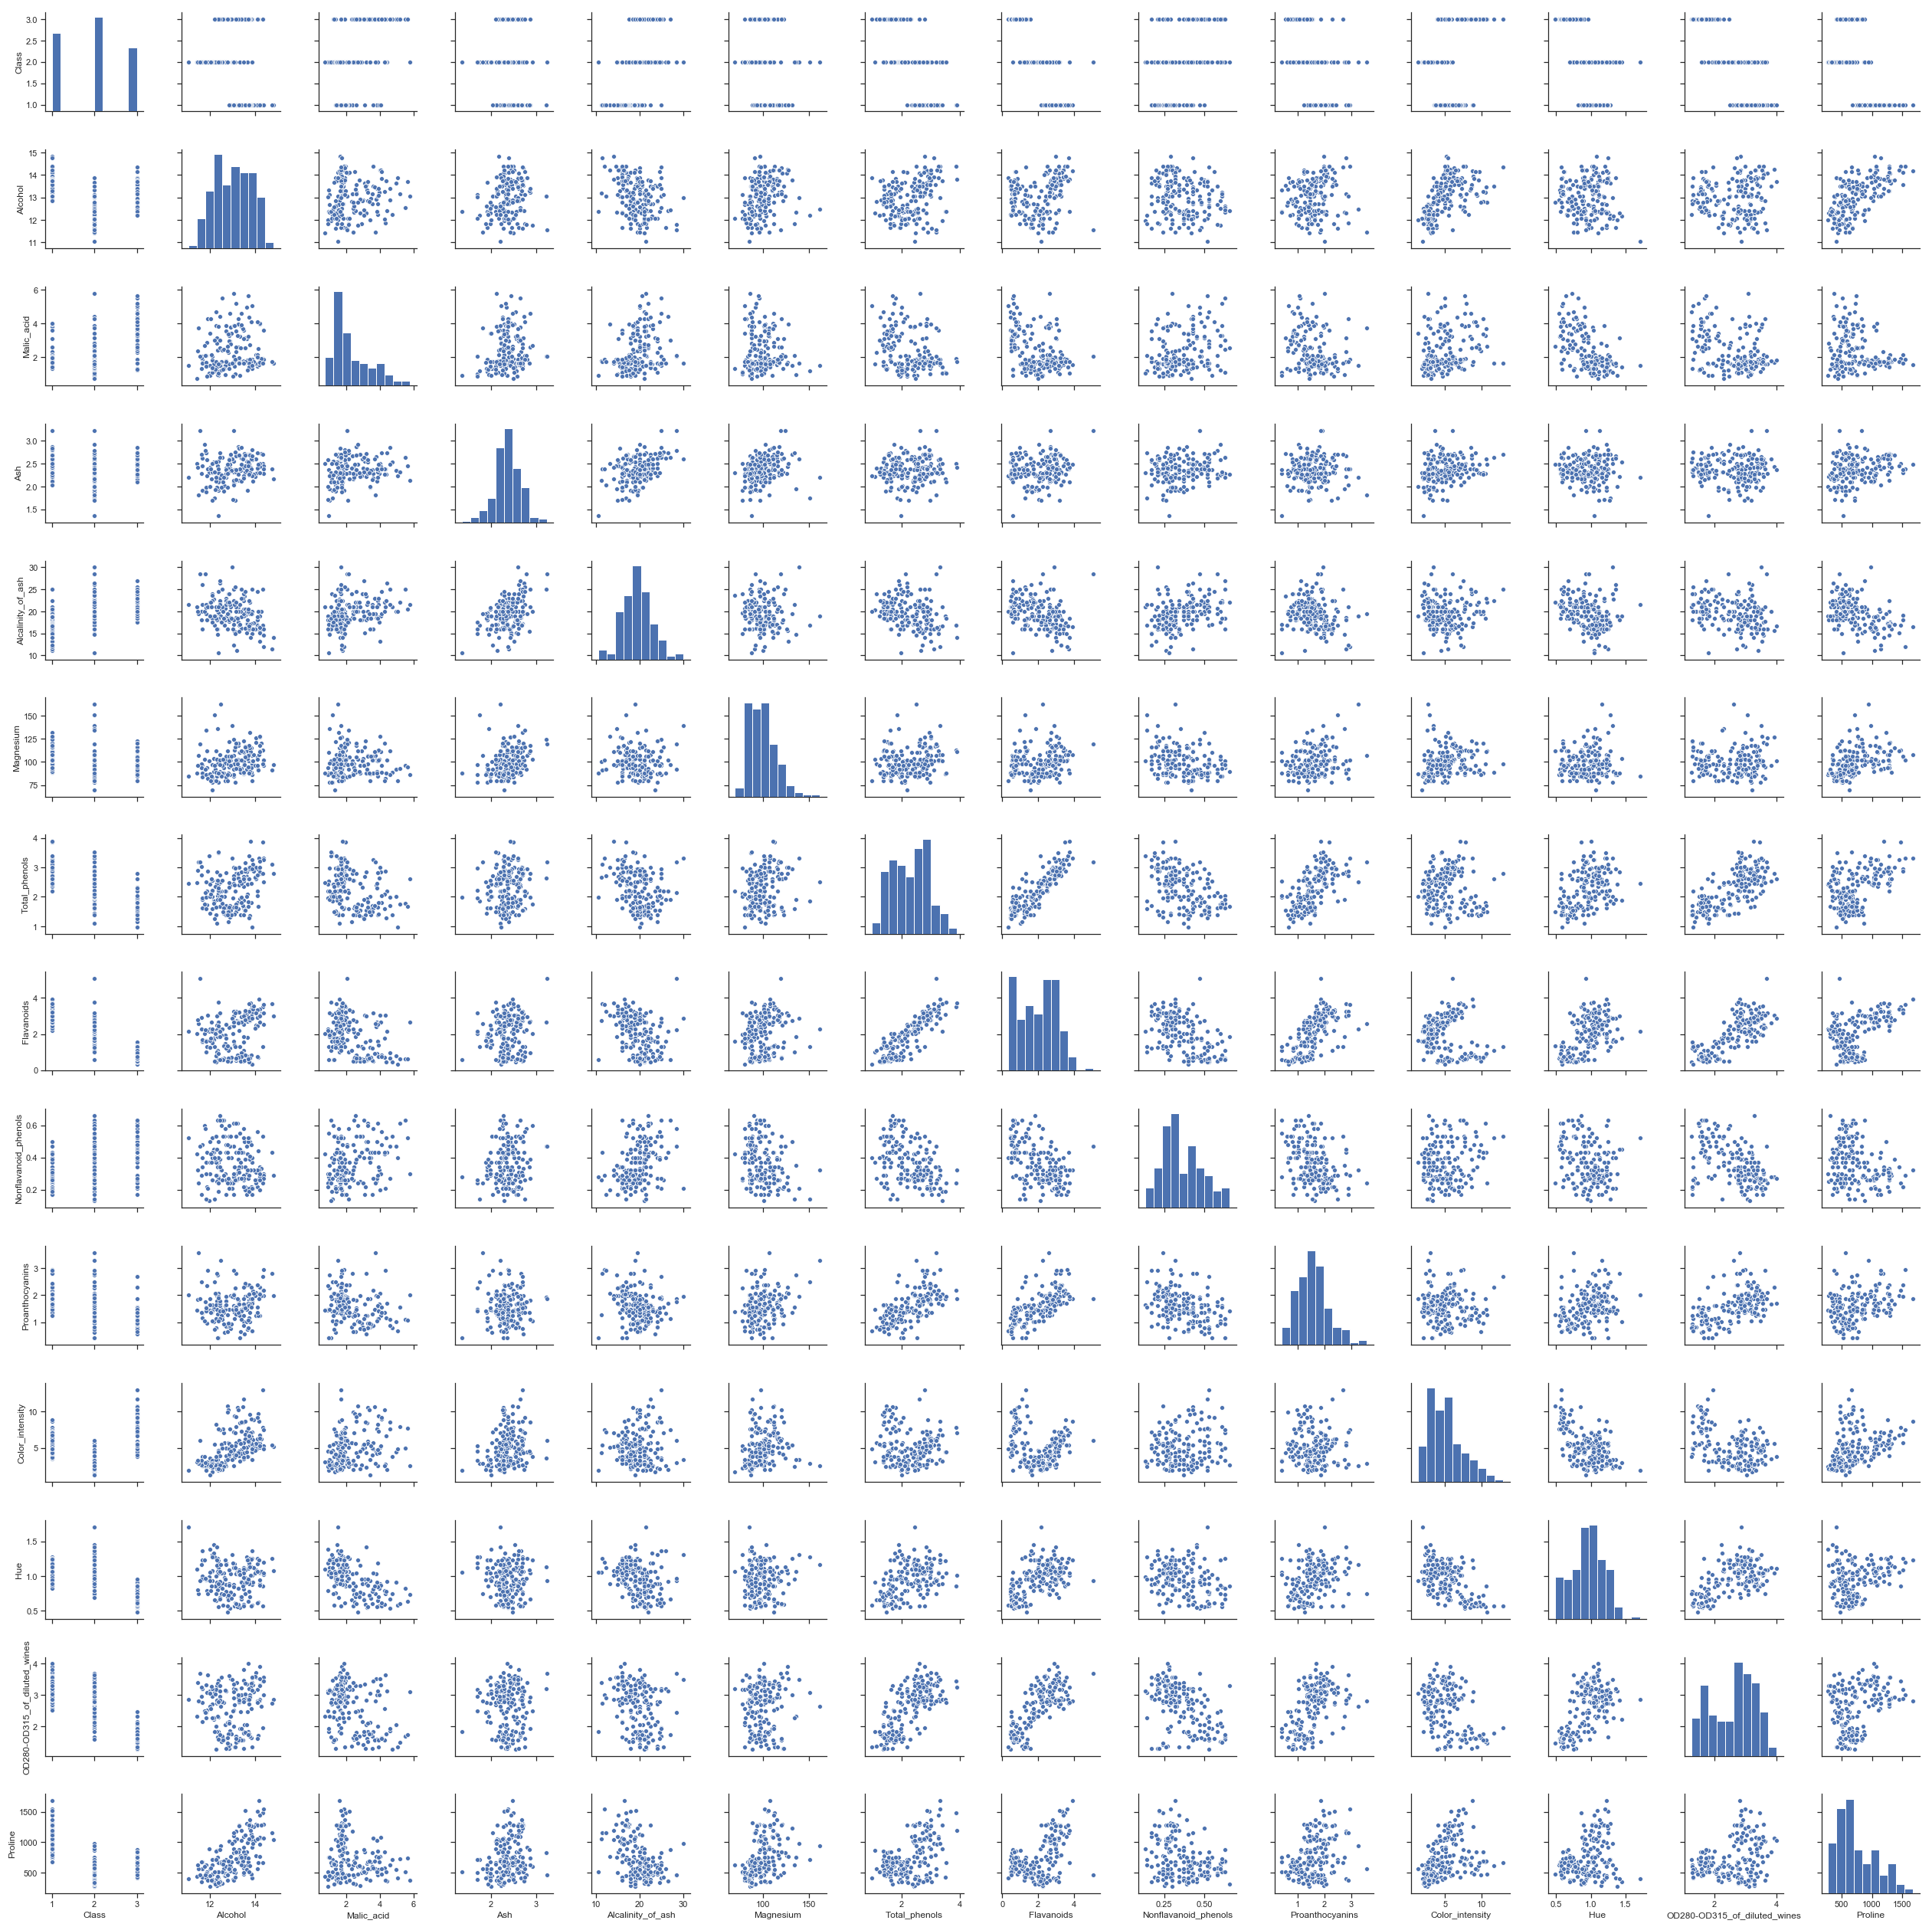

In [162]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_w)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


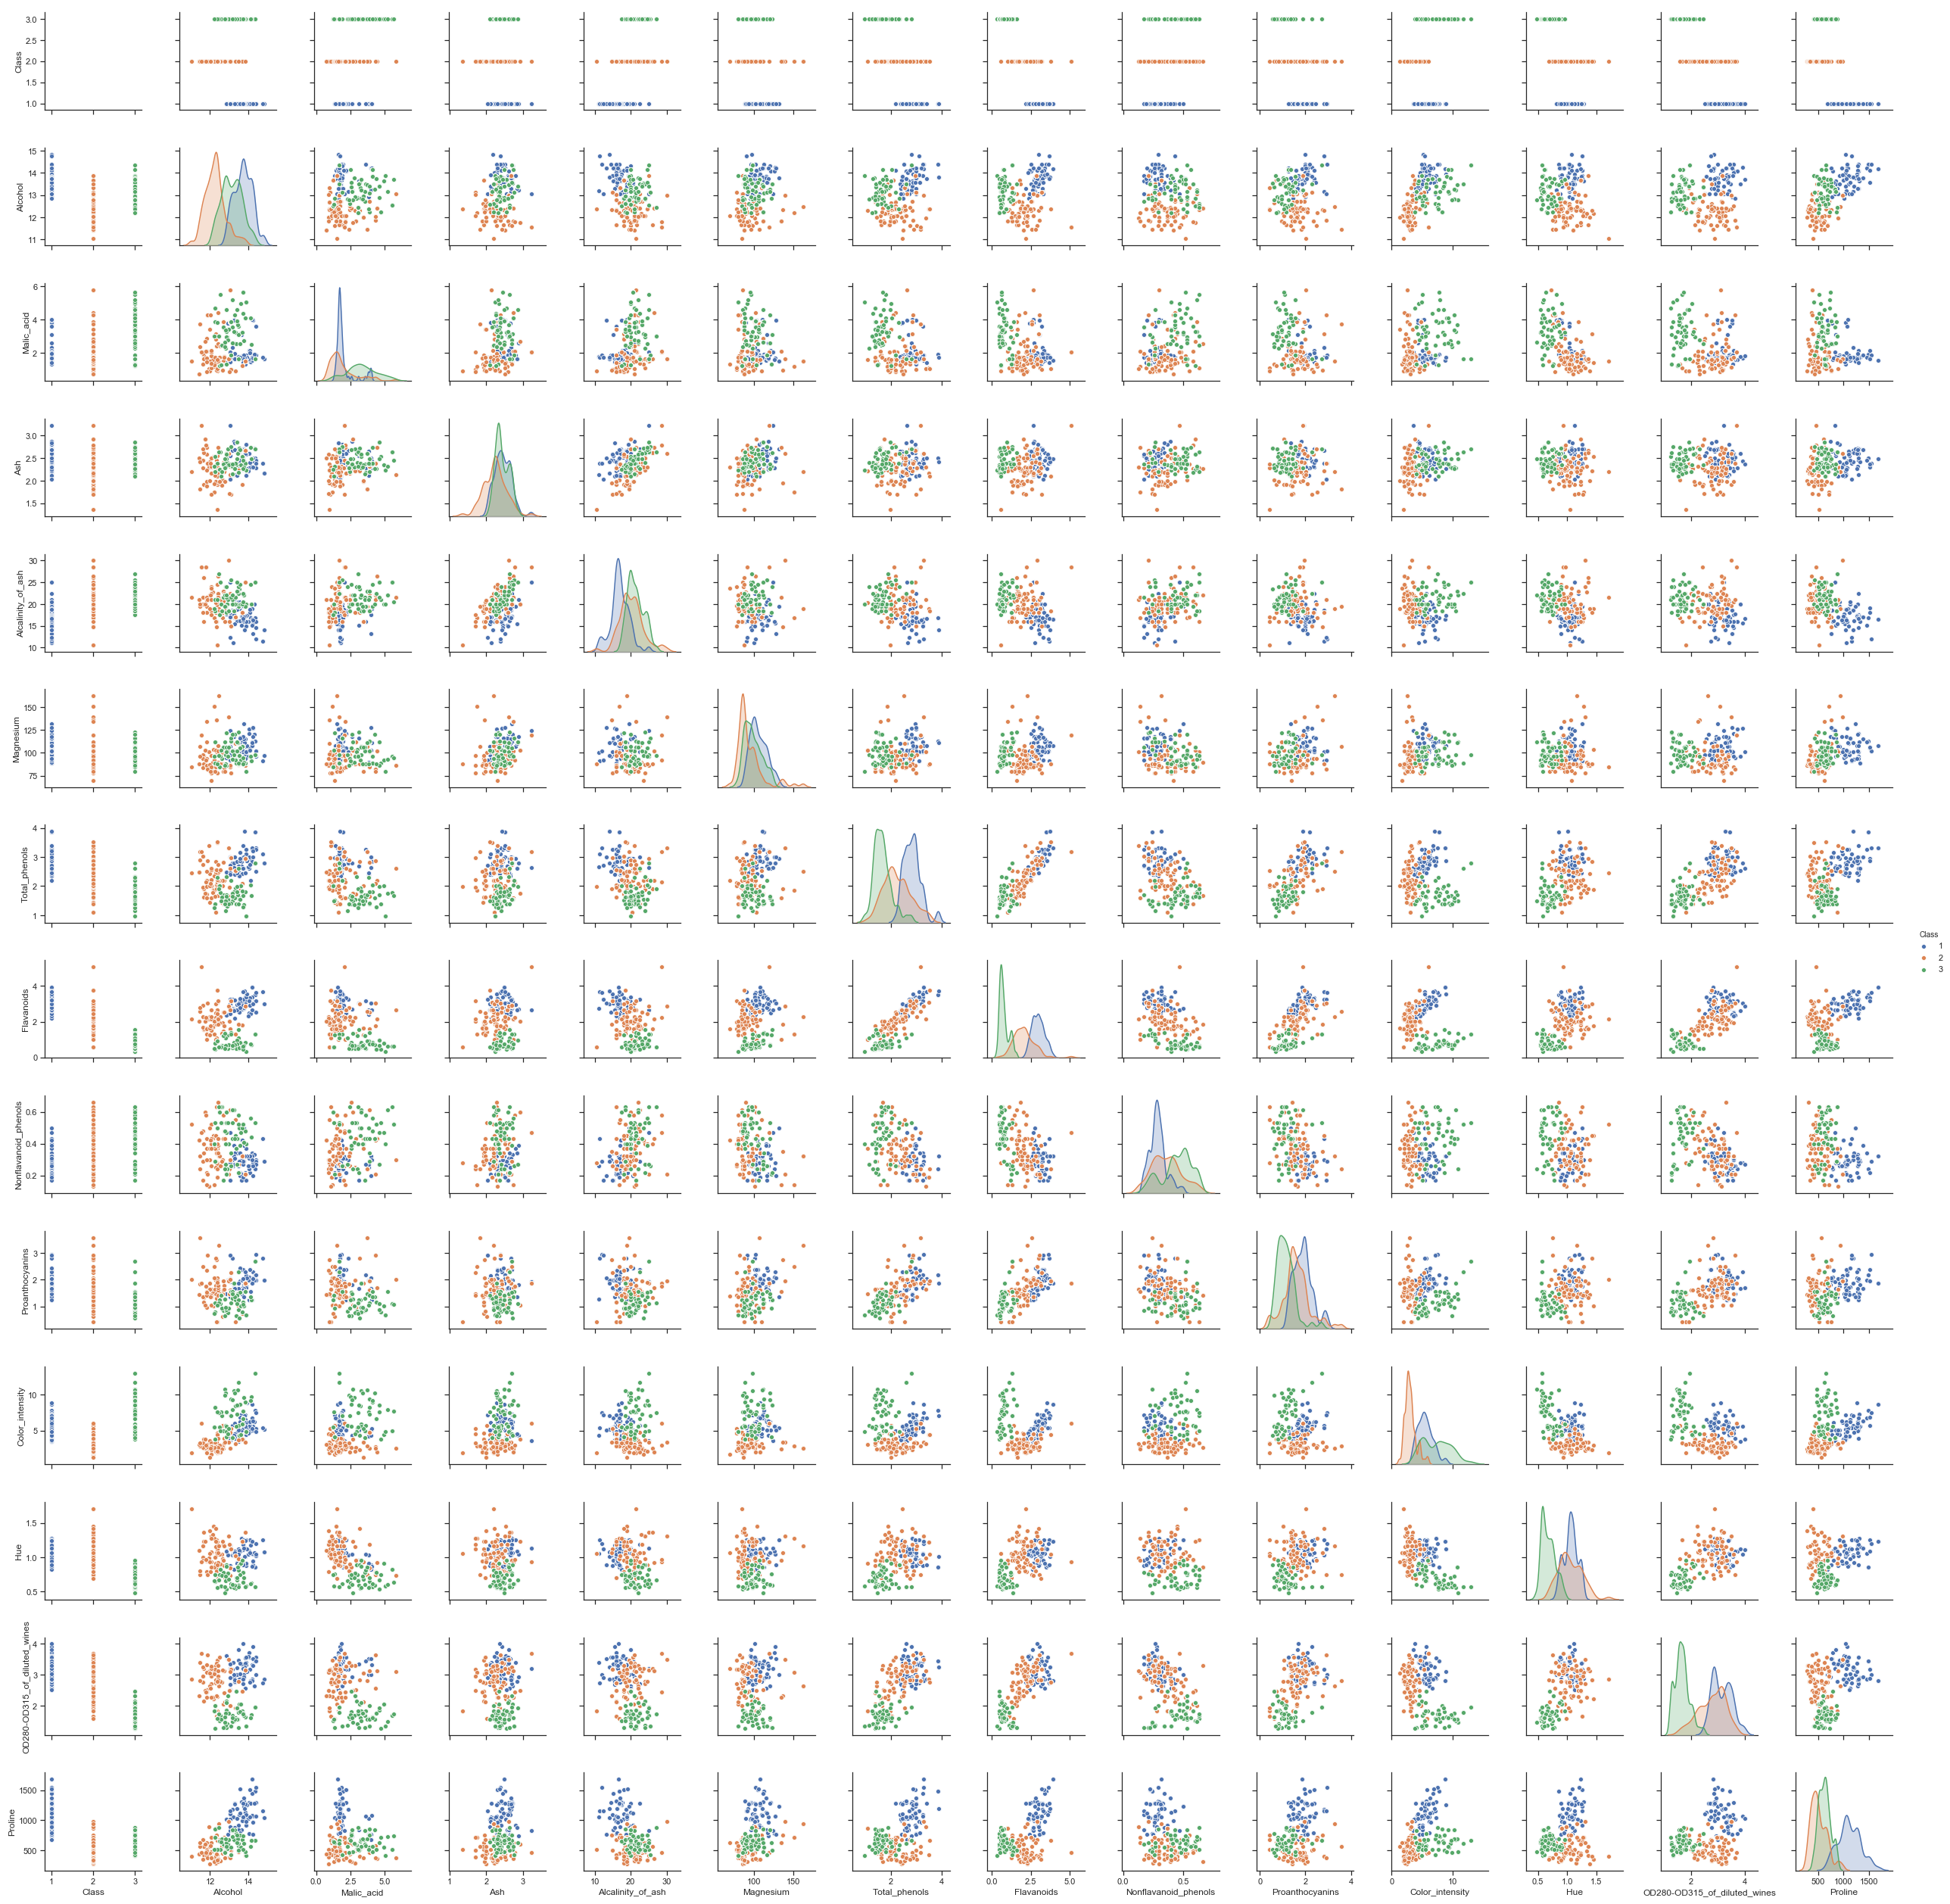

In [270]:
sns.pairplot(fin_df, hue='Class')

In [217]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_w['Alcohol_ss'] = ss.fit_transform(df_w[['Alcohol']])
df_w['Malic_acid_ss'] = ss.fit_transform(df_w[['Malic_acid']])
df_w['Ash_ss'] = ss.fit_transform(df_w[['Ash']])
df_w['Alcalinity_of_ash_ss'] = ss.fit_transform(df_w[['Alcalinity_of_ash']])
df_w['Magnesium_ss'] = ss.fit_transform(df_w[['Magnesium']])
df_w['Total_phenols_ss'] = ss.fit_transform(df_w[['Total_phenols']])
df_w['Flavanoids_ss'] = ss.fit_transform(df_w[['Flavanoids']])
df_w['Nonflavanoid_phenols_ss'] = ss.fit_transform(df_w[['Nonflavanoid_phenols']])
df_w['Proanthocyanins_ss'] = ss.fit_transform(df_w[['Proanthocyanins']])
df_w['Color_intensity_ss'] = ss.fit_transform(df_w[['Color_intensity']])
df_w['Hue_ss'] = ss.fit_transform(df_w[['Hue']])
df_w['OD280-OD315_of_diluted_wines_ss'] = ss.fit_transform(df_w[['OD280-OD315_of_diluted_wines']])
df_w['Proline_ss'] = ss.fit_transform(df_w[['Proline']])

X_fin = fin_df[['Alcohol','Malic_acid','Ash',
          'Alcalinity_of_ash','Magnesium',
          'Total_phenols','Flavanoids','Nonflavanoid_phenols',
         'Proanthocyanins','Color_intensity','Hue',
         'OD280-OD315_of_diluted_wines','Proline']].values
X_w = X_fin
#X.head()
# X_fin = df_w[['Alcohol_ss','Malic_acid_ss','Ash_ss',
#           'Alcalinity_of_ash_ss','Magnesium_ss',
#           'Total_phenols_ss','Flavanoids_ss','Nonflavanoid_phenols_ss',
#          'Proanthocyanins_ss','Color_intensity_ss','Hue_ss',
#          'OD280-OD315_of_diluted_wines_ss','Proline_ss']].values


# df_dia['Glucose_ss'] = ss.fit_transform(df_dia[['Glucose']])
# df_dia['BloodPressure_ss'] = ss.fit_transform(df_dia[['BloodPressure']])
# df_dia['SkinThickness_ss'] = ss.fit_transform(df_dia[['SkinThickness']])
# df_dia['Insulin_ss'] = ss.fit_transform(df_dia[['Insulin']])
# df_dia['BMI_ss'] = ss.fit_transform(df_dia[['BMI']])
# df_dia['DiabetesPedigreeFunction_ss'] = ss.fit_transform(df_dia[['DiabetesPedigreeFunction']])
# df_dia['Age_ss'] = ss.fit_transform(df_dia[['Age']])
# df_dia.describe().round(2)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [218]:
X_w.shape
y_w.shape

#sns.pairplot(df_w, hue="Class")

(1780, 3)

In [254]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_w,y_w,random_state = 22,test_size=0.2)

In [255]:
X_train.shape


(1424, 13)

In [259]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [264]:
#K.clear_session()
model3 = Sequential()

In [265]:
model3.add(Dense(7, input_shape=(13,), activation='relu',kernel_initializer='normal'))
model3.add(Dense(1, input_shape=(7,), activation='relu'))
model3.add(Dense(3, activation='sigmoid'))
model3.summary()
model3.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 7)                 98        
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 8         
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 6         
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


In [268]:
model3.fit(X_train, y_train, batch_size=12,epochs=20,validation_split=0.2)
#validation_split=0.2
#verbose=0

Train on 1139 samples, validate on 285 samples
Epoch 1/20
1139/1139 [==============================] - 0s 202us/step - loss: 0.6317 - acc: 0.6667 - val_loss: 0.6273 - val_acc: 0.6667
Epoch 2/20
1139/1139 [==============================] - 0s 205us/step - loss: 0.6314 - acc: 0.6667 - val_loss: 0.6270 - val_acc: 0.6667
Epoch 3/20
1139/1139 [==============================] - 0s 213us/step - loss: 0.6319 - acc: 0.6667 - val_loss: 0.6279 - val_acc: 0.6667
Epoch 4/20
1139/1139 [==============================] - 0s 204us/step - loss: 0.6315 - acc: 0.6667 - val_loss: 0.6278 - val_acc: 0.6667
Epoch 5/20
1139/1139 [==============================] - 0s 203us/step - loss: 0.6316 - acc: 0.6667 - val_loss: 0.6273 - val_acc: 0.6667
Epoch 6/20
1139/1139 [==============================] - 0s 212us/step - loss: 0.6315 - acc: 0.6667 - val_loss: 0.6277 - val_acc: 0.6667
Epoch 7/20
1139/1139 [==============================] - 0s 205us/step - loss: 0.6314 - acc: 0.6667 - val_loss: 0.6275 - val_acc: 0.6667
E

In [269]:
result = model3.evaluate(X_test, y_test)
print('  ',result)

356/356 [==============================] - 0s 51us/step
   [0.6304240387477232, 0.6666666865348816]


### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a Neural Network is a function to extract 2 high level features to represent our data.

- build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output: 3 nodes
- choose activation functions, initializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- remember to train the model on the scaled data
- define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- calculate the features and plot them on a 2-dimensional scatter plot
- can we distinguish the 3 classes well?

In [271]:
X_fin2 = fin_df[['Alcohol','Flavanoids']].values
X_w = X_fin2

In [309]:
X_train,X_test,y_train,y_test = train_test_split(X_w,y_w,random_state = 22,test_size=0.2)

In [313]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='relu',kernel_initializer='zeros'))
model2.add(Dense(5, input_shape=(8,), activation='relu'))
model2.add(Dense(3, input_shape=(5,), activation='relu'))
model2.add(Dense(3, activation='sigmoid'))
#model2.summary()
model2.compile(loss='binary_crossentropy',optimizer=Adagrad(lr=0.8),metrics=['accuracy'])


In [314]:
X_train.shape

(1424, 2)

In [315]:
model2.fit(X_train, y_train, batch_size=3,epochs=20,validation_split=0.2)

Train on 1139 samples, validate on 285 samples
Epoch 1/20
1139/1139 [==============================] - 5s 4ms/step - loss: 0.6380 - acc: 0.6643 - val_loss: 0.6253 - val_acc: 0.6667
Epoch 2/20
1139/1139 [==============================] - 1s 1ms/step - loss: 0.6341 - acc: 0.6667 - val_loss: 0.6251 - val_acc: 0.6667
Epoch 3/20
1139/1139 [==============================] - 1s 1ms/step - loss: 0.6337 - acc: 0.6667 - val_loss: 0.6272 - val_acc: 0.6667
Epoch 4/20
1139/1139 [==============================] - 2s 1ms/step - loss: 0.6332 - acc: 0.6667 - val_loss: 0.6294 - val_acc: 0.6667
Epoch 5/20
1139/1139 [==============================] - 2s 1ms/step - loss: 0.6332 - acc: 0.6667 - val_loss: 0.6255 - val_acc: 0.6667
Epoch 6/20
1139/1139 [==============================] - 2s 1ms/step - loss: 0.6326 - acc: 0.6667 - val_loss: 0.6250 - val_acc: 0.6667
Epoch 7/20
1139/1139 [==============================] - 2s 1ms/step - loss: 0.6331 - acc: 0.6667 - val_loss: 0.6250 - val_acc: 0.6667
Epoch 8/20
1139

In [316]:
# inits = ['zeros', 'ones', 'uniform', 'lecun_uniform',
#          'normal', 'he_normal', 'glorot_normal']

# for init in inits:

#     K.clear_session()

#     model = Sequential()
#     model.add(Dense(10, input_shape=(4,),
#                     kernel_initializer=init,
                    
                    
                    
result = model2.evaluate(X_test, y_test)
print('  ',result)

356/356 [==============================] - 0s 98us/step
   [0.6307040781117557, 0.6666666865348816]


In [320]:
import keras.backend as K
inp = model.layers[0].input
out = model.layers[0].output
features_function = K.function([inp], [out])



In [323]:
plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model2.fit(X_train, y_train, batch_size=16,
                  epochs=1, verbose=0)
    test_acc = model2.evaluate(X_test, y_test,
                              verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1],
                c=y_test, cmap='coolwarm', marker='.')
    plt.xlim(-0.5, 15)
    plt.ylim(-0.5, 15)
    
    acc_ = test_acc * 100.0
    t = 'Epoch: {}, Test Acc: {:3.1f} %'.format(i, acc_)
    plt.title(t, fontsize=11)

plt.tight_layout();

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [327]:
X_train.shape

(1424, 2)

In [329]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(8, activation='relu')(inputs)
x = Dense(5, activation='relu')(x)
second_to_last = Dense(2, activation='relu')(x)
output = Dense(3, activation='sigmoid')(second_to_last)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=3,epochs=10,validation_split=0.2)  
#X_train, y_train# starts training

Train on 1139 samples, validate on 285 samples
Epoch 1/10
1139/1139 [==============================] - 4s 3ms/step - loss: 1.0520 - acc: 0.4039 - val_loss: 0.8998 - val_acc: 0.4842
Epoch 2/10
1139/1139 [==============================] - 1s 879us/step - loss: 0.8623 - acc: 0.5268 - val_loss: 0.7773 - val_acc: 0.5965
Epoch 3/10
1139/1139 [==============================] - 1s 875us/step - loss: 0.7474 - acc: 0.6014 - val_loss: 0.6590 - val_acc: 0.7965
Epoch 4/10
1139/1139 [==============================] - 1s 891us/step - loss: 0.6291 - acc: 0.7559 - val_loss: 0.5678 - val_acc: 0.7930
Epoch 5/10
1139/1139 [==============================] - 1s 887us/step - loss: 0.5481 - acc: 0.7638 - val_loss: 0.4990 - val_acc: 0.7860
Epoch 6/10
1139/1139 [==============================] - 1s 899us/step - loss: 0.5116 - acc: 0.7550 - val_loss: 0.4760 - val_acc: 0.8035
Epoch 7/10
1139/1139 [==============================] - 1s 883us/step - loss: 0.4905 - acc: 0.7709 - val_loss: 0.4922 - val_acc: 0.7789
Epo

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory

In [343]:
import keras
from keras.callbacks import ModelCheckpoint, TensorBoard
X_train,X_test,y_train,y_test = train_test_split(X_w,y_w,random_state = 42,test_size=0.3)
keras.backend.clear_session()

In [341]:
#kernel_initializer='zeros'
inputs = Input(shape=(2,))
x = Dense(8, activation='relu')(inputs)
x = Dense(5, activation='relu')(x)
second_to_last = Dense(2, activation='relu')(x)
output = Dense(3, activation='sigmoid')(second_to_last)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
modelCheckpoint = ModelCheckpoint(filepath="##",verbose=1, save_best_only=True)
board = TensorBoard(log_dir='##')
callbacks_ = [earlyStop,modelCheckpoint,board]

In [344]:
model.fit(X_train, y_train,batch_size=3,epochs=10,validation_split=0.2,validation_data=(X_test, y_test),callbacks = callbacks_)  